## The purpose of this notebook is to prototype the data visualization functionality

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load up notes.npy and cut it slightly short to prototype the visualization
notes = np.load('notes.npy')
audio = np.load('spectrogram.npy')


In [2]:
print(len(notes))

def slice_notes(notes, start=0, end=2):
    '''
    Takes a notes array and slices it between start and end in seconds
    '''
    assert start < end, "Error: start value must be less than end value"

    start_tick, end_tick = start*100, end*100
    return notes[start_tick:end_tick]

sliced_notes = slice_notes(notes, start = 5, end = 9)


26837


In [3]:
import pickle
import pandas as pd
from pathlib import Path
 
# It's going to be important to have the one hot encoding : note key for visualization
# This needs to be generated from note_keys.csv

# Open note keys as a dataframe
note_keys_path = Path.cwd().parent / 'Documentation' / 'note_keys.csv'

note_keys_df = pd.read_csv(note_keys_path)

note_dict = note_keys_df[['One Hot Representation', 'Note']].set_index('One Hot Representation').to_dict()['Note']

# Save this for later
with open('note_dict.pkl', 'wb') as f:
    pickle.dump(note_dict, f)
f.close()

| Note | Int Representation |
|------|--------------------|
| G    | 1                  |
| R    | 2                  |
| Y    | 3                  |
| B    | 4                  |
| O    | 5                  |
| open | 6                  |

Instead of string representations, change to lists of integers corresponding to the notes that are within

Call this "viz_dict"

In [4]:
viz_dict = {}
string_to_list = {
    'G' : 1,
    'R' : 2,
    'Y' : 3,
    'B' : 4,
    'O' : 5,
    'o' : 6
}

for k, v in note_dict.items():
    viz_dict[k] = [string_to_list[x] for x in v if x not in ['o', 'p', 'e', 'n']]
    if viz_dict[k] == []:
        viz_dict[k] = [6]

# Save for later
with open('viz_dict.pkl', 'wb') as f:
    pickle.dump(viz_dict,f)
f.close()

3


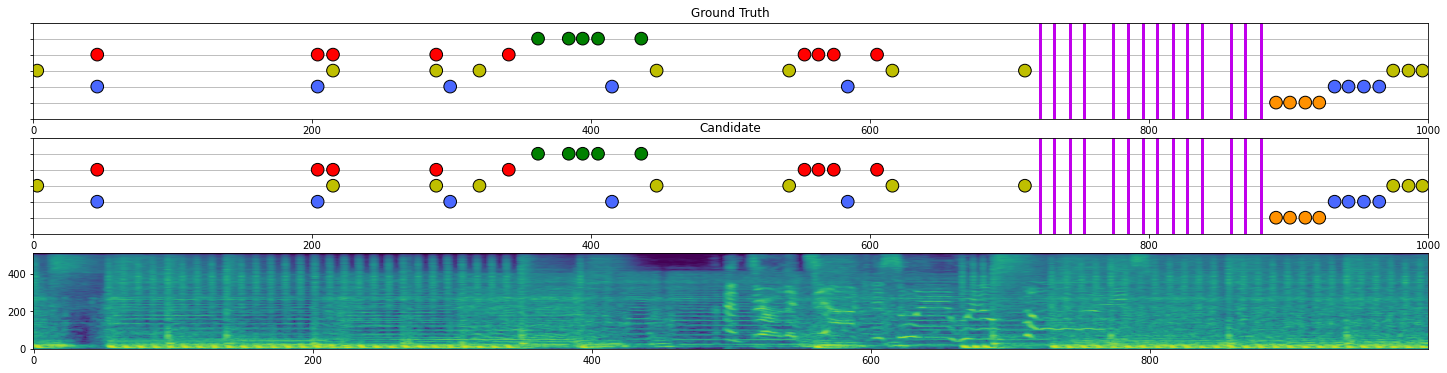

In [7]:
# Encodes the y position of the notes
note_idx_to_y = {
    1 : 5,
    2 : 4,
    3 : 3,
    4 : 2,
    5 : 1
}

note_idx_to_c = {
    1 : 'g',
    2 : 'r',
    3 : 'y',
    4 : '#4a68ff',
    5 : '#ff9100'
}

# First, create an x vector, a y vector, and a color vector
def create_scatter_axes(notes, ax=None):
    '''
    Takes a notes array and creates three vectors:
    -   x : x positions of scatter points
    -   x_lines : x position of open notes
    -   y : y positions of scatter points
    -   c : color array of scatter points
    '''
    x = []
    y = []
    c = []
    x_lines = []

    scaler = 1 # This scaler to scale the y dimension up or down

    # Loop through the whole notes array
    for idx, note in enumerate(notes):
        if not note: # Skip zeros
            continue

        chord = viz_dict[note]
        for n in chord:
            if n != 6:  # If not an open note
                x.append(idx)
                y.append(note_idx_to_y[n]*scaler)
                c.append(note_idx_to_c[n])
            else:
                x_lines.append(idx)

    # Generate coordinates for open notes
    coords = []
    for tick in x_lines:
        coords.append(([tick, tick], [0, 6]))

    # Plot GRYBO notes
    if ax is None:
        ax = plt.gca()
    # fig.set_size_inches(min(len(notes)/40, 900), 2)

    ax.set_ylim((0,6))
    ax.set_xlabel('Ticks', fontsize=15)
    ax.set_yticks(np.arange(0,7,1))
    ax.grid(axis= 'y', which='both')
    ax.set_axisbelow(True)
    ax.set_yticklabels([])
    ax.set_xlim(0, len(notes))
    ax.scatter(x, y, edgecolors='k', color=c, s=160)

    # Plot open notes
    for coord in coords:
        ax.plot(coord[0], coord[1], linewidth=3, color='#c000eb')

    return ax

def plot_chart(ground_truth, candidate=None, audio=None):
    num_subplots = 1 + int(candidate is not None) + int(audio is not None)

    fig, axes = plt.subplots(num_subplots)
    fig.set_size_inches(min(len(ground_truth)/40, 900), 2*num_subplots)

    # Create the ground truth plot
    create_scatter_axes(ground_truth, axes[0])
    axes[0].set_title('Ground Truth')

    # Compare the candidate
    if candidate is not None:
        create_scatter_axes(candidate, axes[1])
        axes[1].set_title('Candidate')

    if audio is not None:
        axes[2].imshow(audio, aspect='auto', origin='lower')
    
    fig.align_xlabels(axes)

    print(num_subplots)

sliced_notes = slice_notes(notes, start = 60, end = 70)
ax = plot_chart(sliced_notes, sliced_notes, audio[:, 6000:7000])

# fig, ax = plt.subplots()
# fig.set_size_inches(,2)
# ax.set_ylim((0,6))


# plt.scatter(x, y, color=c, s = 150)